In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the image dataset
Xtrain_img = np.load('datasets/unlabelled_train_data_images.npy')

# Check the shape of the dataset
print(f"Dataset shape: {Xtrain_img.shape}")

# Reshape the data for clustering
# If shape is (n_samples, cmap, height, width) for grayscale images
n_samples, cmap, height, width = Xtrain_img.shape
X_reshaped = Xtrain_img.reshape(n_samples, height * width)

# If shape is (n_samples, height, width, channels) for color images
# n_samples, height, width, channels = Xtrain_img.shape
# X_reshaped = Xtrain_img.reshape(n_samples, height * width * channels)

# Optional: Scale the data
X_scaled = StandardScaler().fit_transform(X_reshaped)


Dataset shape: (60000, 1, 28, 28)


In [5]:
# Apply K-means clustering
n_clusters = 10  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Count samples in each cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))
print("Samples in each cluster:", cluster_counts)


Samples in each cluster: {0: 7349, 1: 3680, 2: 7756, 3: 3435, 4: 4954, 5: 8524, 6: 2881, 7: 1078, 8: 9341, 9: 11002}


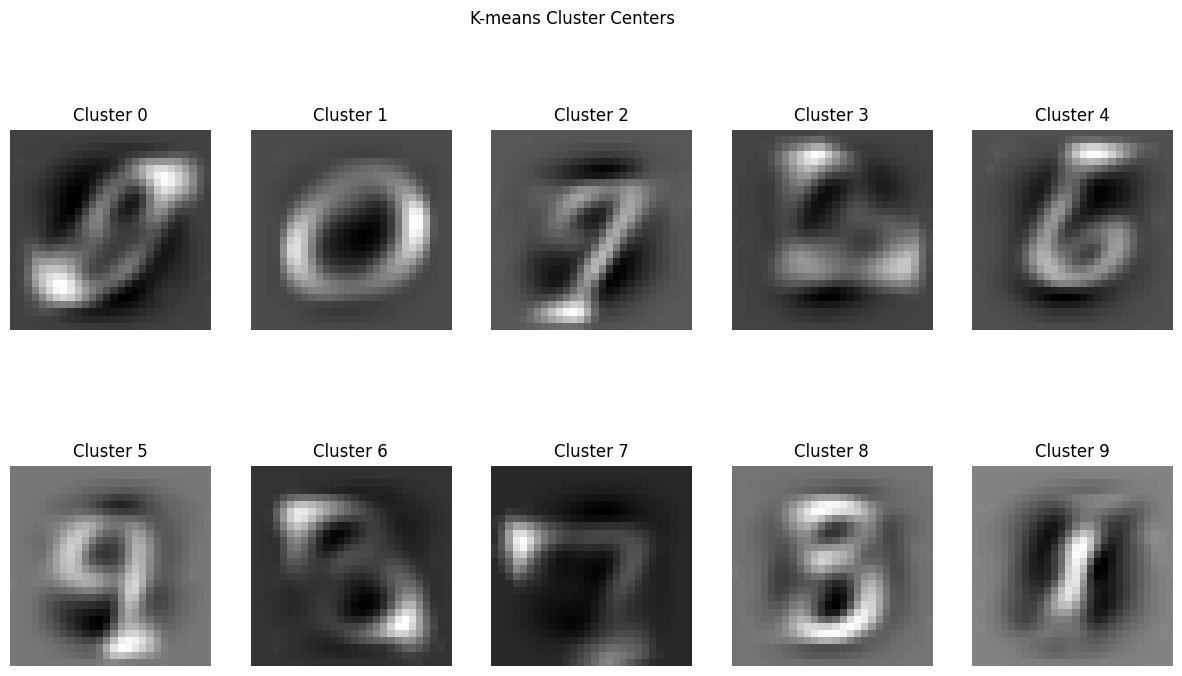

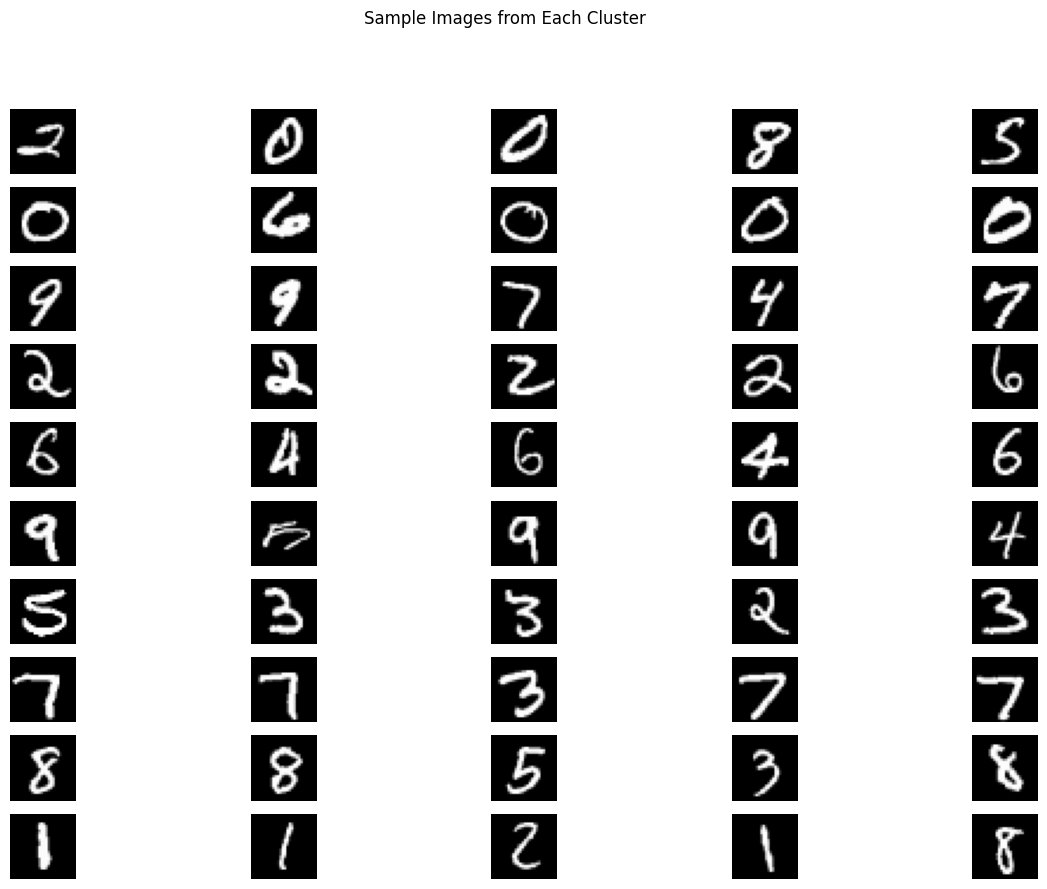

In [7]:
# Visualize cluster centers as images
plt.figure(figsize=(15, 8))
for i in range(n_clusters):
    # Reshape the cluster center back to image dimensions
    center_image = cluster_centers[i].reshape(height, width)
    
    plt.subplot(2, n_clusters//2, i+1)
    plt.imshow(center_image, cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.suptitle('K-means Cluster Centers')
plt.show()

# Visualize some images from each cluster
plt.figure(figsize=(15, 10))
for i in range(n_clusters):
    # Get indices of images in this cluster
    cluster_indices = np.where(cluster_labels == i)[0]
    
    # Display up to 5 images from this cluster
    for j, idx in enumerate(cluster_indices[:5]):
        if j >= 5:
            break
        plt.subplot(n_clusters, 5, i*5 + j + 1)
        plt.imshow(Xtrain_img[idx].squeeze(), cmap='gray')
        plt.axis('off')
plt.suptitle('Sample Images from Each Cluster')
plt.show()


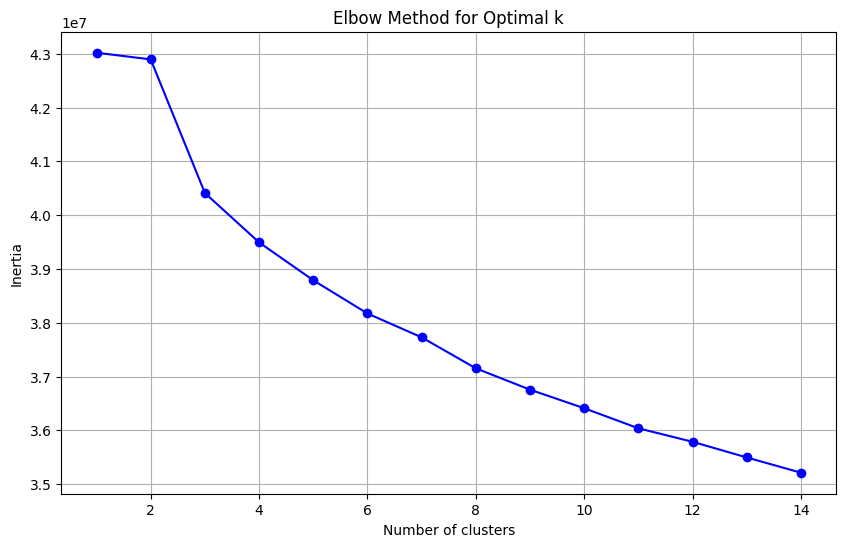

In [8]:
# Elbow Method for finding optimal K
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


cluster_labels: [8 6 8 ... 7 6 5]


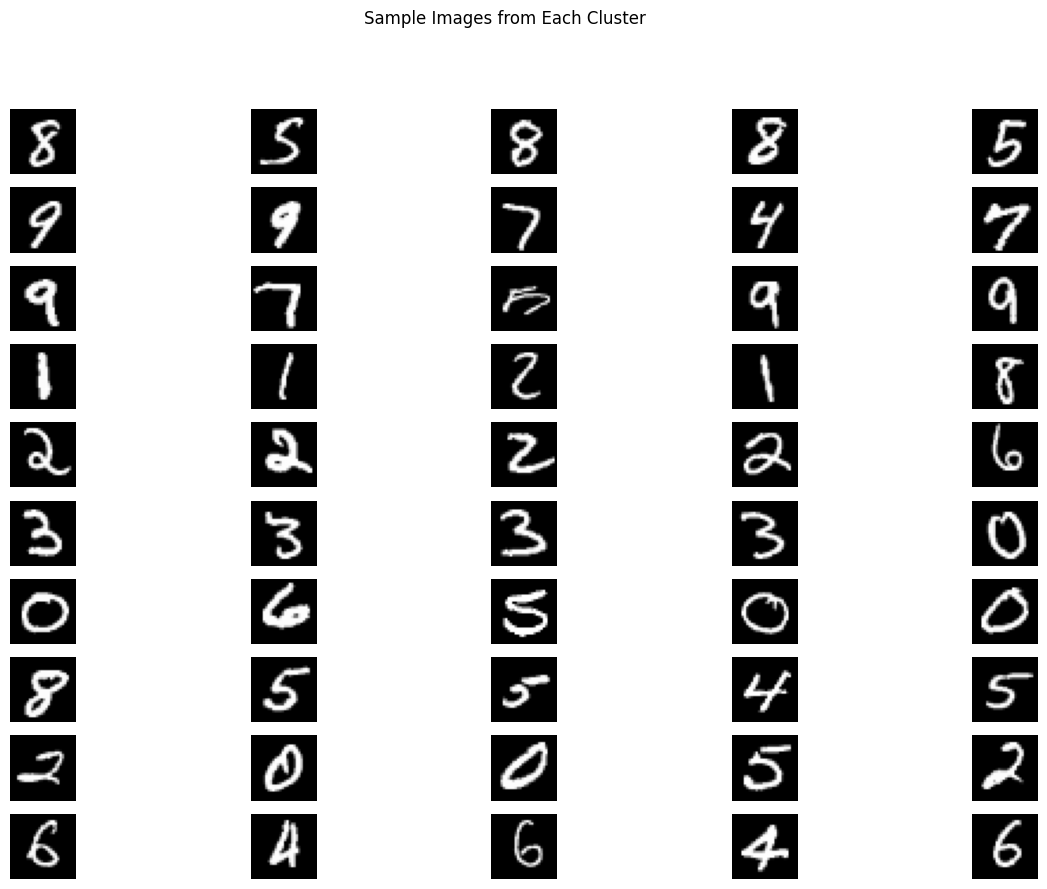

In [10]:
# 1. Flatten and scale images
X_flat = Xtrain_img.reshape(Xtrain_img.shape[0], -1)
X_scaled = StandardScaler().fit_transform(X_flat)

# 2. Dimensionality reduction
from sklearn.decomposition import PCA
X_pca = PCA(n_components=50, random_state=42).fit_transform(X_scaled)

# 3. Clustering
from sklearn.cluster import KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)
print(f'cluster_labels: {cluster_labels}')

# 4. Visualize sample images from each cluster
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    for j, idx in enumerate(cluster_indices[:5]):
        plt.subplot(n_clusters, 5, i*5 + j + 1)
        plt.imshow(Xtrain_img[idx].squeeze(), cmap='gray')
        plt.axis('off')
plt.suptitle('Sample Images from Each Cluster')
plt.show()
